In [60]:
import os
import pickle
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas

In [18]:
TOKEN_DIR = '../data/BILLS/token'

In [19]:
def plot_terms(labels, values):
    indices = np.argsort(values)[::-1]

    labels = np.array(labels)[indices]
    values = np.array(values)[indices]
    indexes = np.arange(len(labels))

    # Set the size of the chart & chart the results.
    fig = plt.figure(figsize=(25, 10), dpi=160)
    plt.bar(indexes, values, color='#ff8000')
    plt.xticks(indexes, labels, rotation=30)
    plt.show()

In [20]:
counts = Counter()
token_dict = {}

for token_file in os.listdir(TOKEN_DIR):
    try:
        with open( os.path.join( TOKEN_DIR, token_file ), 'rb' ) as fhand:
            tokens = pickle.load( fhand )
            counts.update(tokens)
            token_dict[token_file] = tokens
    except Exception:
        print( f'Error with {token_file}' )

# Token Frequency

In [21]:
labels, values = zip(*counts.most_common(50))

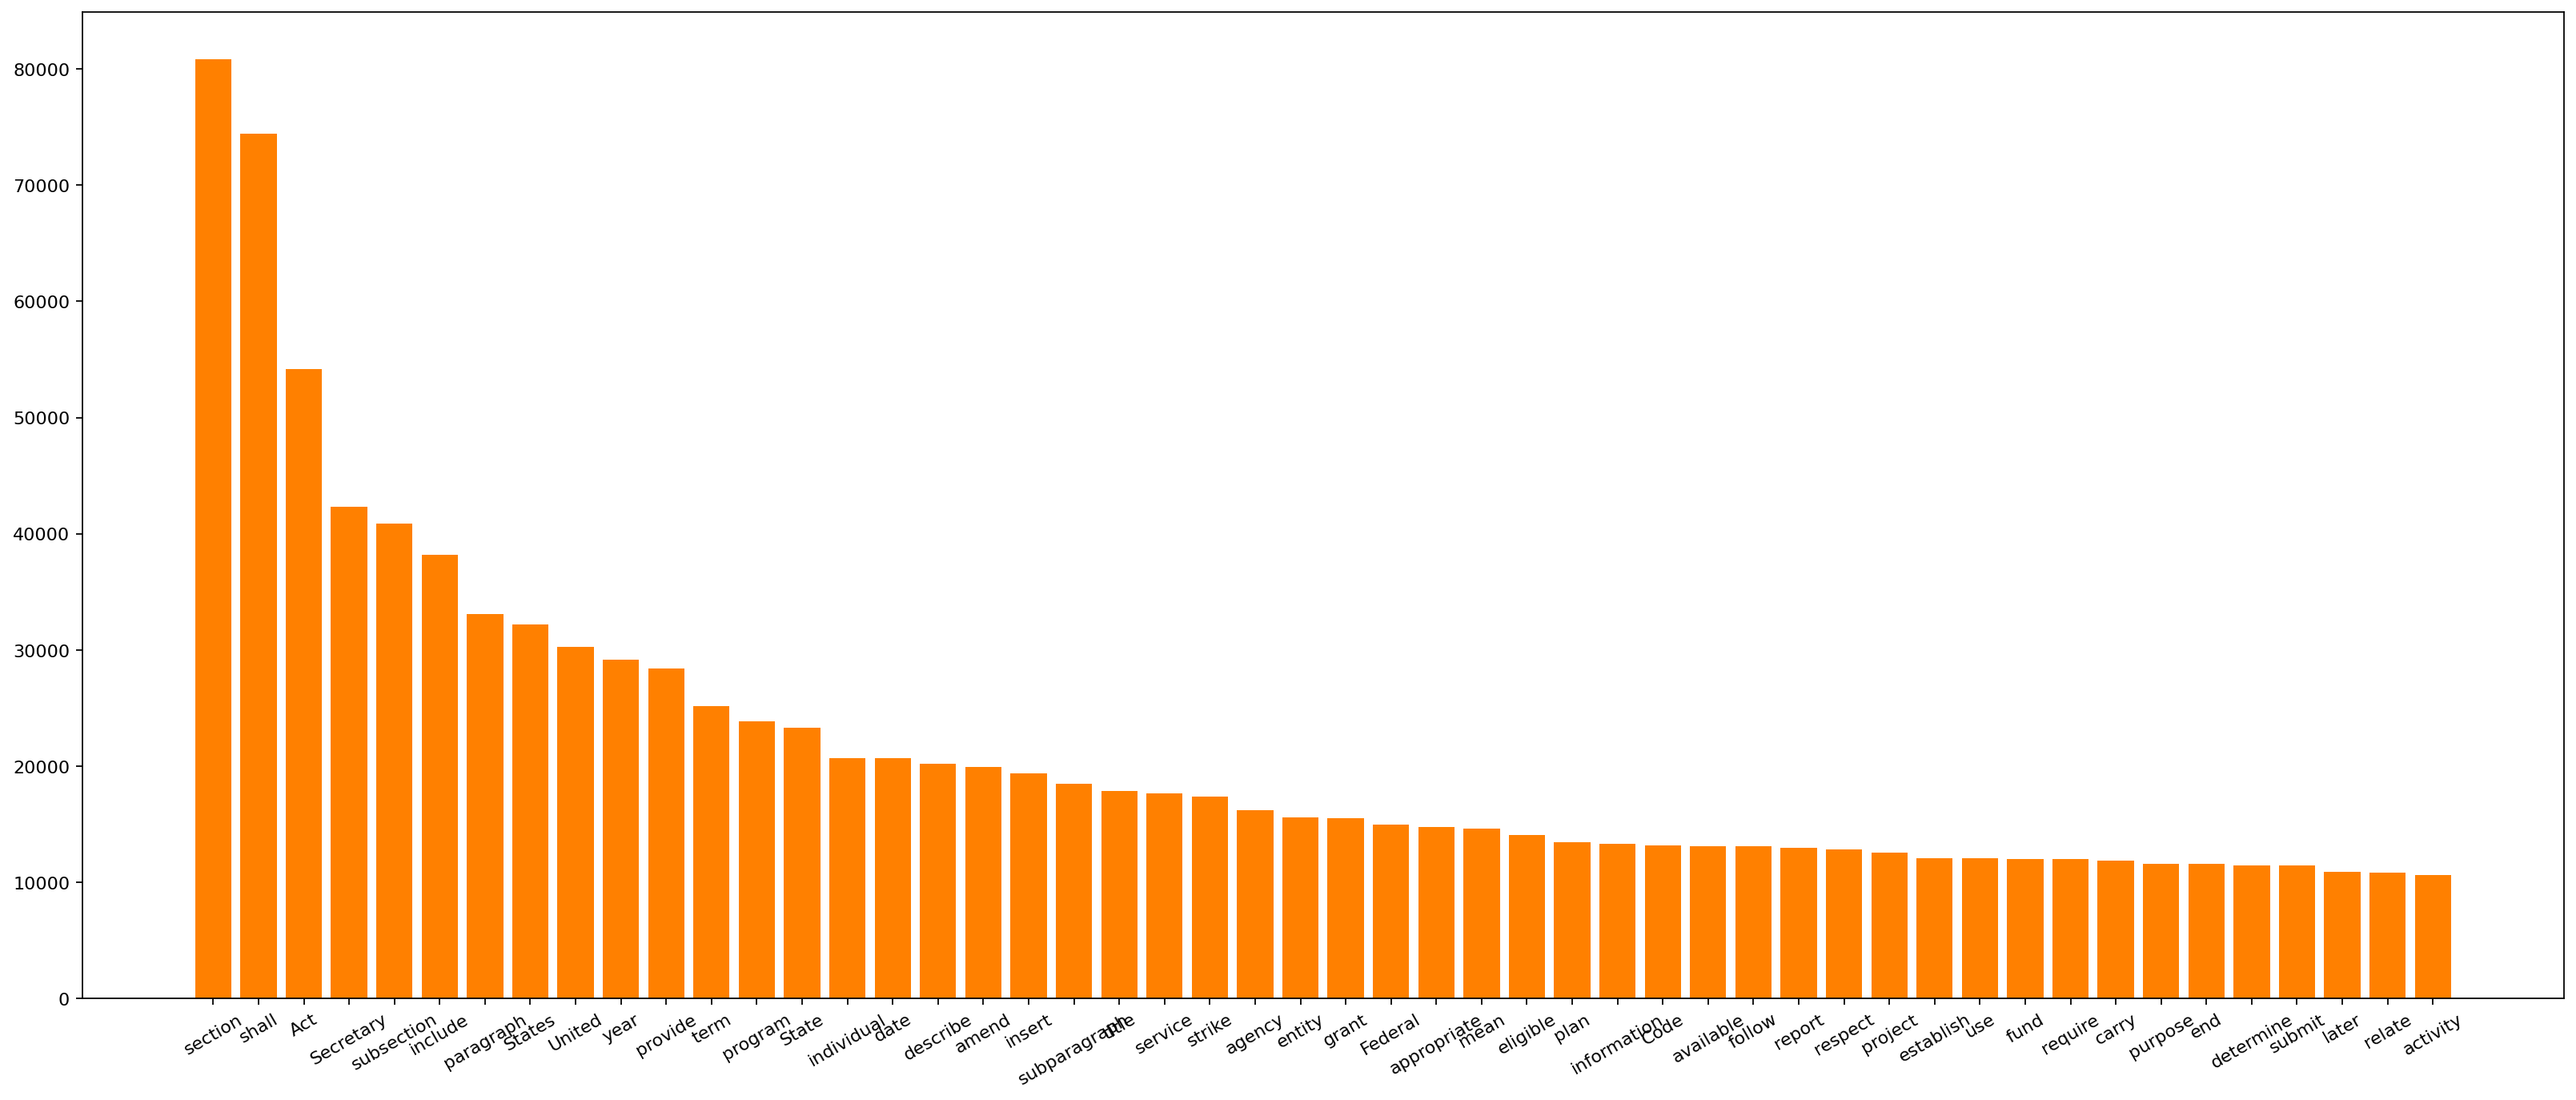

In [22]:
plot_terms(labels, values)

# TD-IDF per document

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

def top_tokens(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_tokens = [(features[i], row[i]) for i in topn_ids]
    return top_tokens

def top_mean_feats(matrix, features, top_n=25):
    # Convert to a numpy array, calculate the mean and return the top tokens.
    D = matrix.toarray()
    tfidf_means = np.mean(D, axis=0)
    return top_tokens(tfidf_means, features, top_n)

In [64]:
tfidf1 = TfidfVectorizer(max_df=0.5, min_df=0.05, preprocessor=lambda x: x, tokenizer=lambda x: x,ngram_range=(1,1))
temp1 = tfidf1.fit_transform(token_dict.values())
temp1_words = tfidf1.get_feature_names_out()
temp1_counts = temp1.toarray().sum(axis=0)

tfidf2 = TfidfVectorizer(max_df=0.5, min_df=0.05, preprocessor=lambda x: x, tokenizer=lambda x: x,ngram_range=(3,3))
temp2 = tfidf2.fit_transform(token_dict.values())
temp2_words = tfidf2.get_feature_names_out()
temp2_counts = temp2.toarray().sum(axis=0)

df1 = pandas.DataFrame({'Words': temp1_words, 'Word_Counts': temp1_counts})
df2 = pandas.DataFrame({'Trigrams': temp2_words, 'Trigrams_Counts': temp2_counts})

/home/jasond/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [55]:
labels1, values1 = zip(*top_mean_feats(tfidf1.fit_transform(token_dict.values()), tfidf1.get_feature_names_out(), top_n=20))
labels2, values2 = zip(*top_mean_feats(tfidf2.fit_transform(token_dict.values()), tfidf2.get_feature_names_out(), top_n=20))

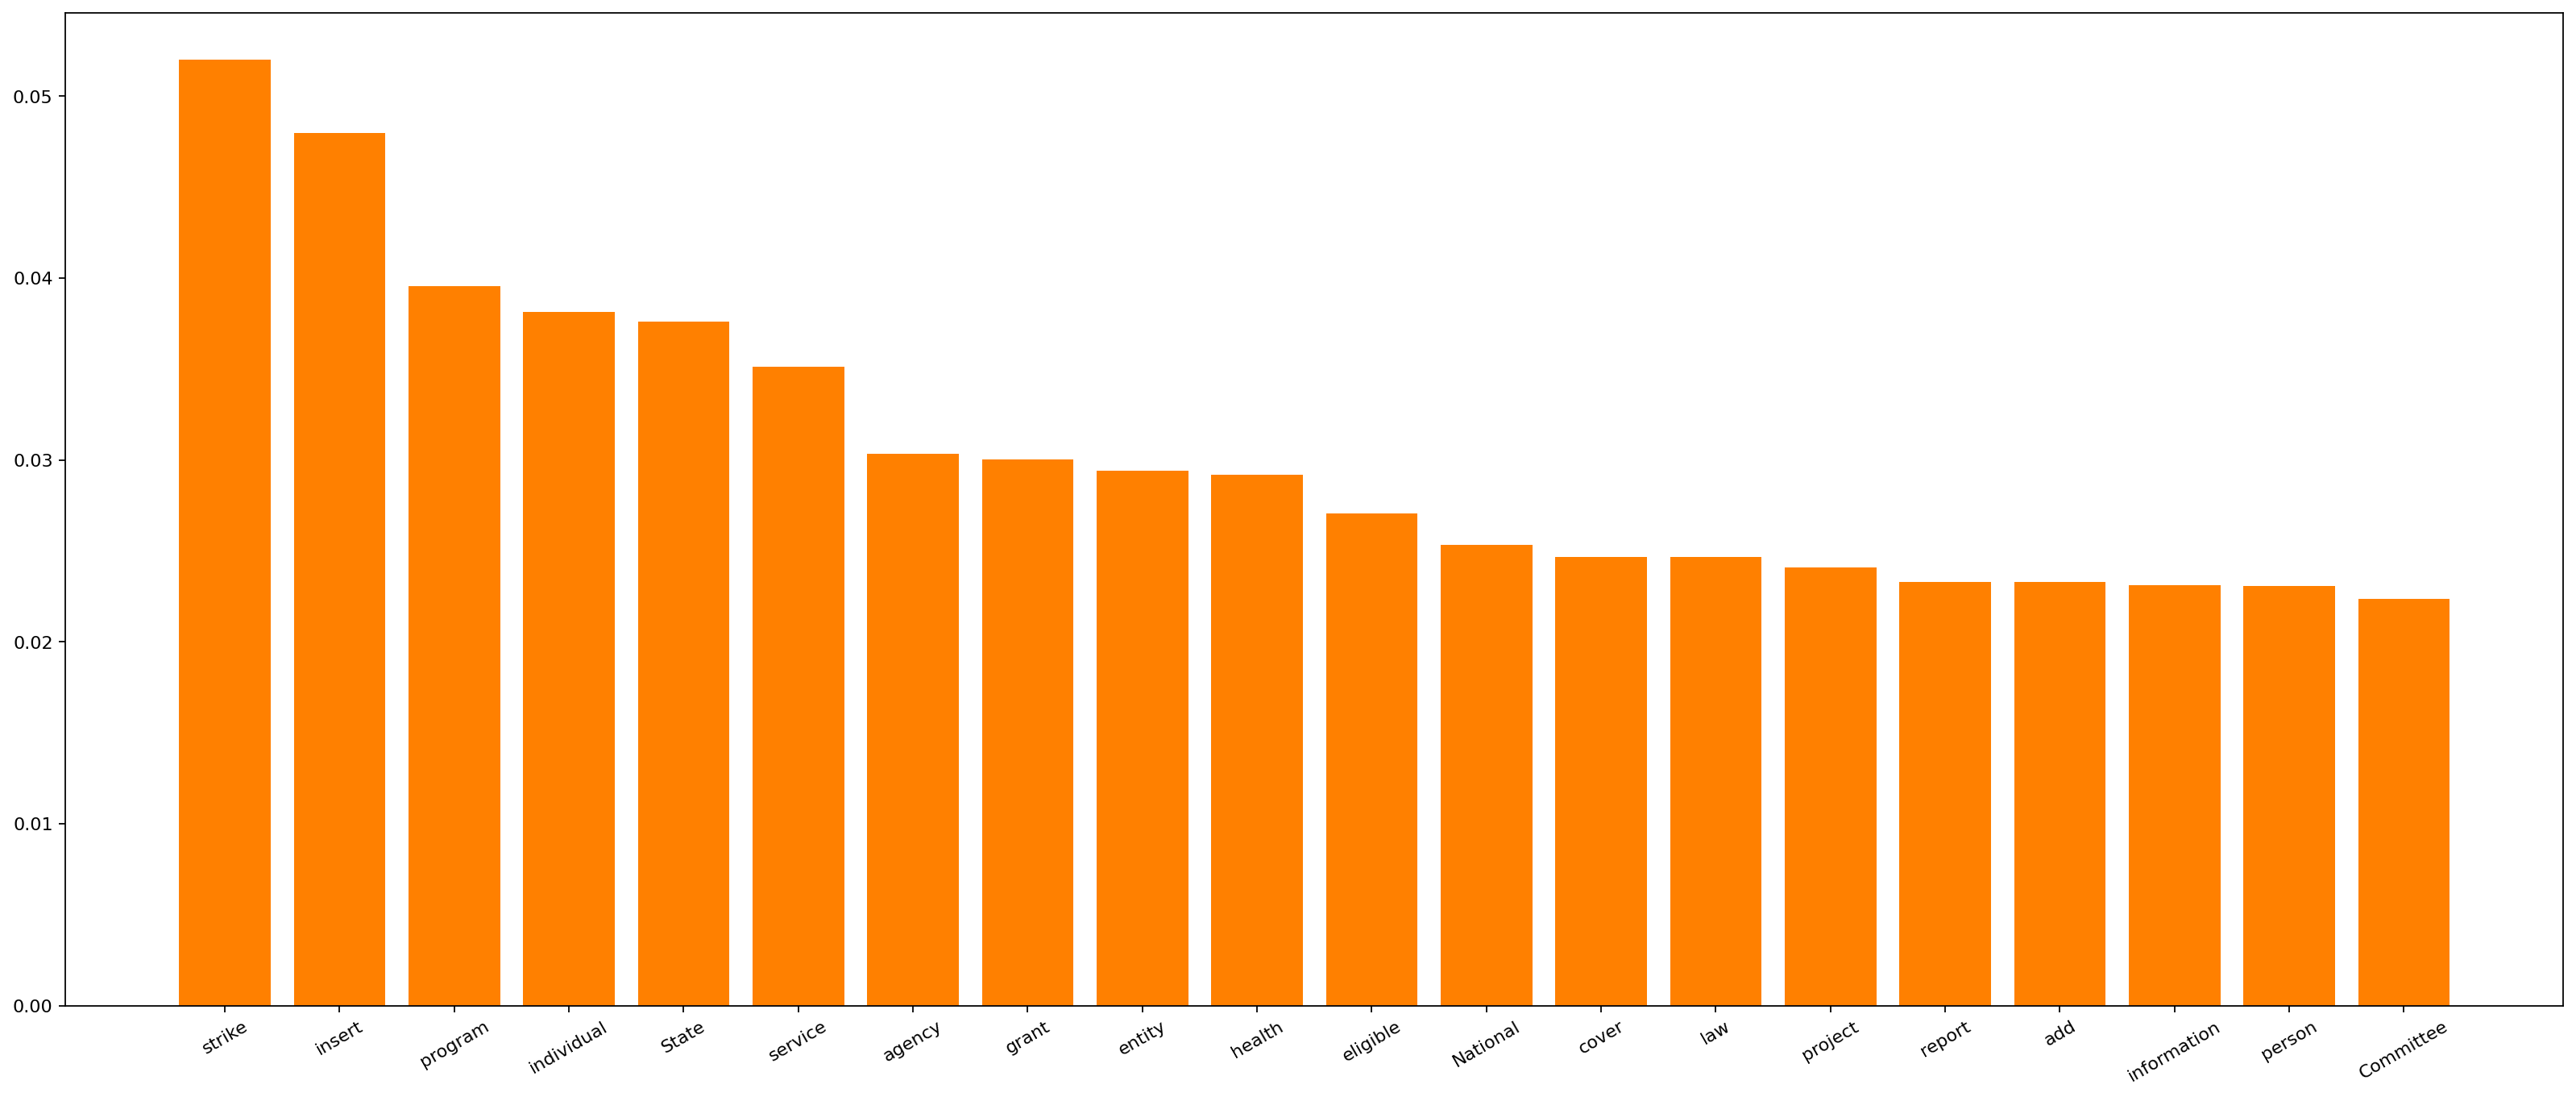

In [52]:
plot_terms( labels1, values1 )

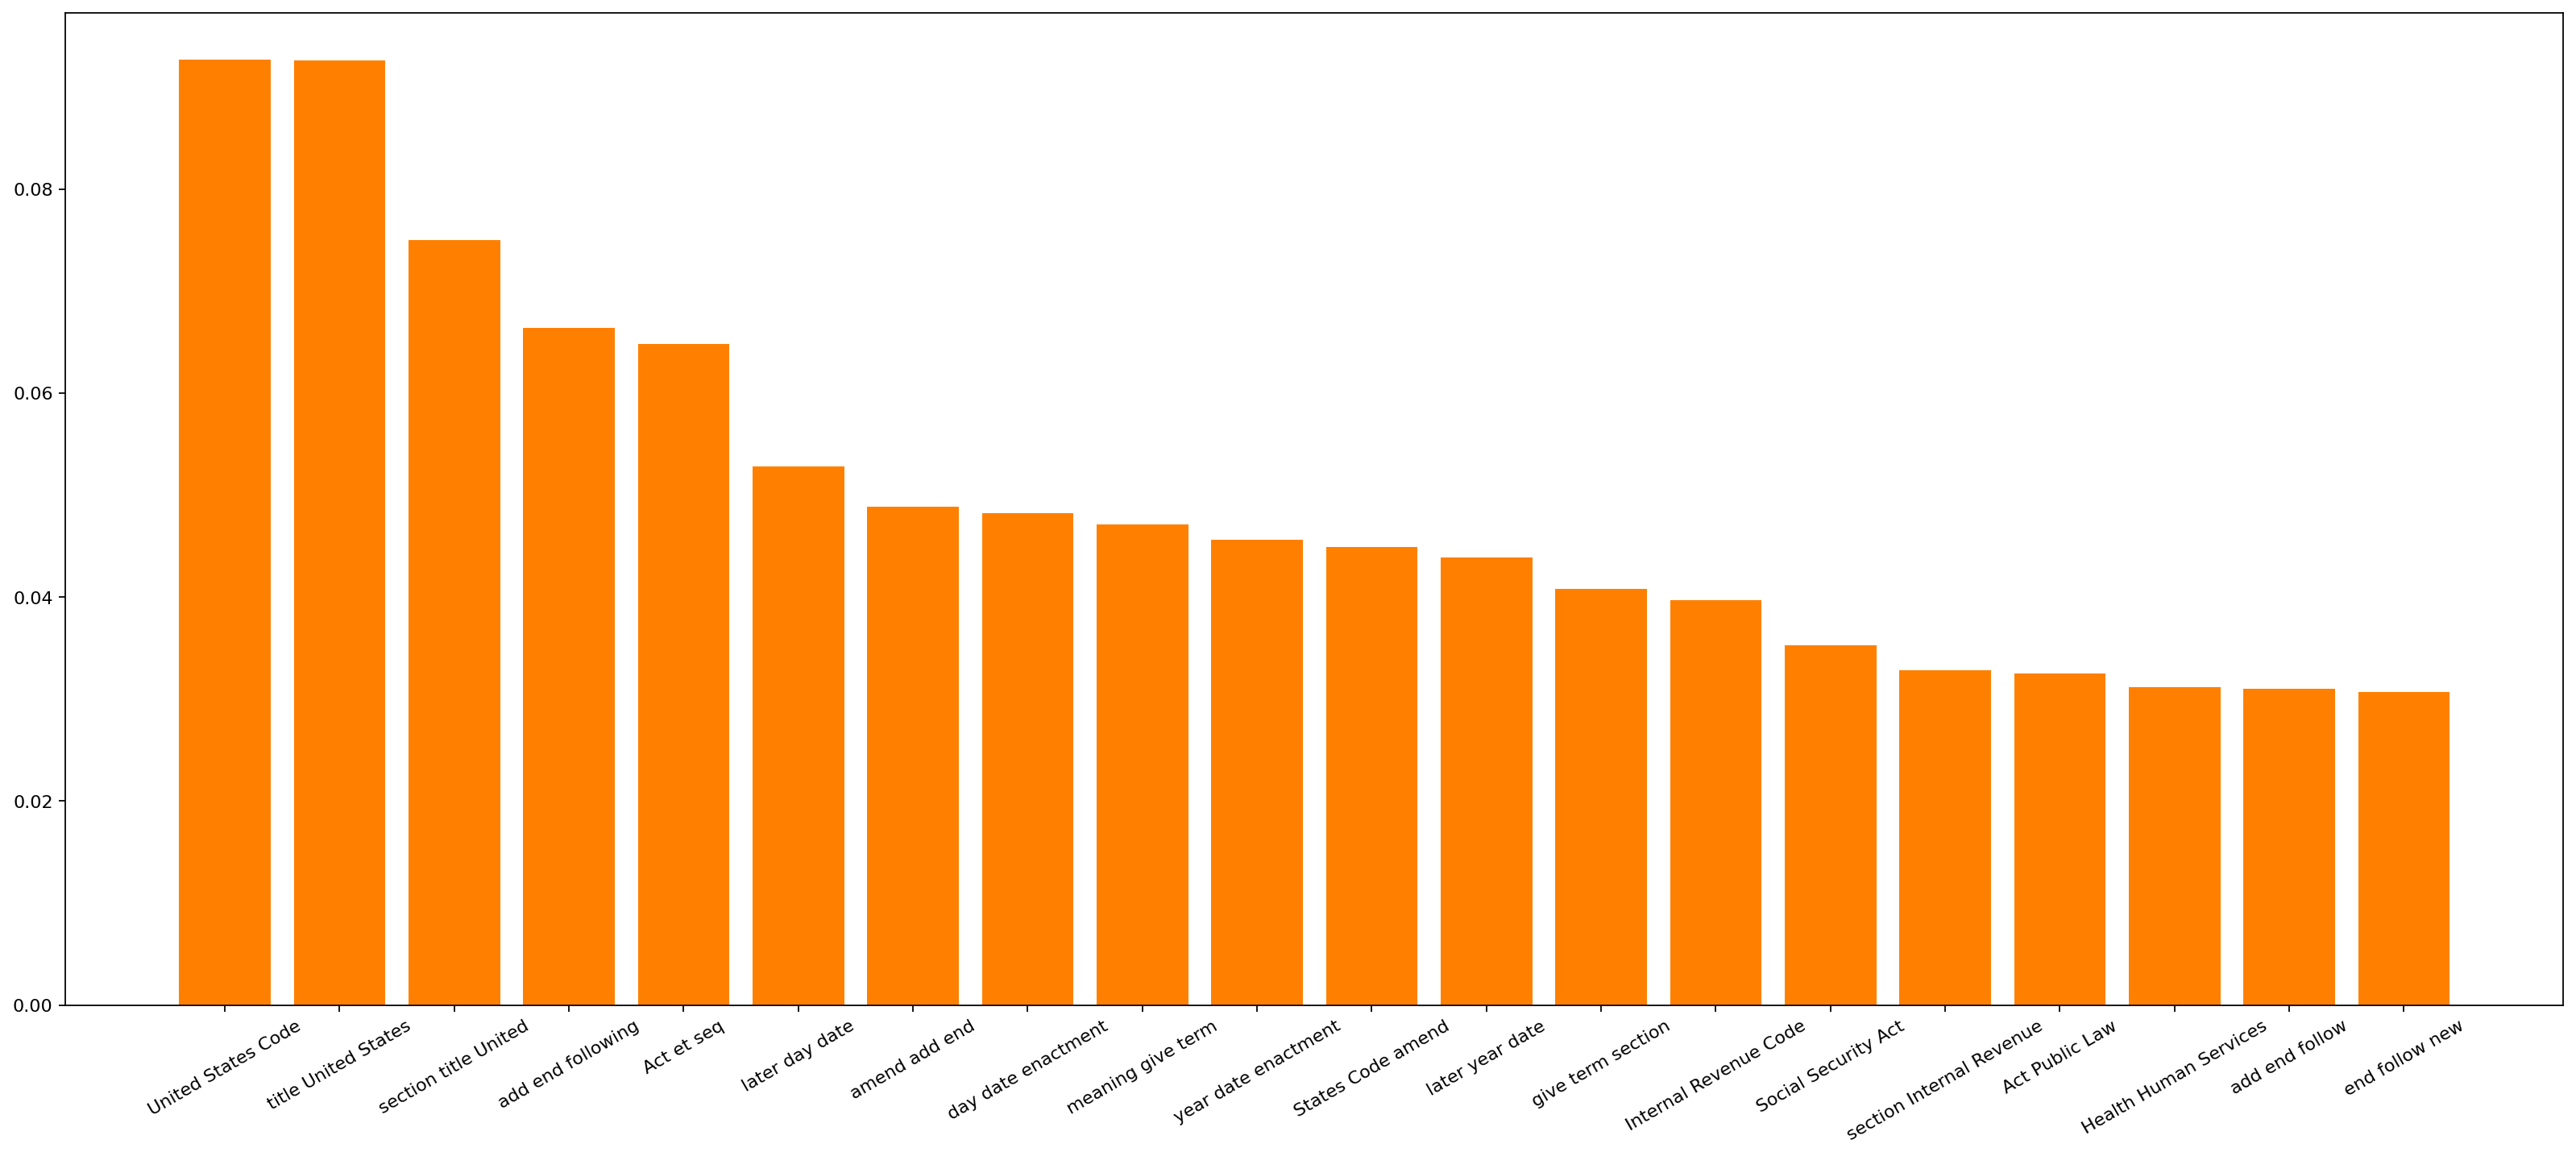

(0.09268950752956089, 0.09259832408243739, 0.07504962337106824, 0.06640444079784076, 0.06481220032565782, 0.052806165110659616, 0.04885116979556343, 0.048274308558517526, 0.04711112080805202, 0.04564076148802833, 0.04492543325328472, 0.043886523579731905, 0.04079836505452268, 0.03971972327786021, 0.03527032344420014, 0.03284247422692482, 0.032545044280291494, 0.031135881564091045, 0.031023860455908235, 0.03069694043752935)


In [58]:
plot_terms( labels2, values2 )
print(values2)

In [ ]:
df1.to_csv('oneword.csv', index=False)
df2.to_csv('threeword.csv', index=False)